# **Project Name**    -   Flipkart Customer Support Query Classifier



##### **Project Type**    - EDA + Classification
##### **Contribution**    - Individual
##### **Name -  Prathmesh Nitnaware**


# **Project Summary -**

 Project Summary
📘 Introduction:
Flipkart, one of India's leading e-commerce platforms, handles a vast volume of customer support queries every day. These queries cover a range of issues such as refund requests, delivery delays, product quality concerns, payment issues, and more. Managing and responding to these queries efficiently is critical to customer satisfaction and operational effectiveness.

This project aims to use Data Science and Machine Learning to automatically classify these support queries based on their content. By doing so, we can help automate the routing of tickets to the appropriate teams and enable faster, more accurate responses.

🎯 Objective:
To develop a supervised machine learning model that can read a customer’s support message and automatically classify it into predefined categories such as refund, delivery issue, damaged product, etc.

This project also involves performing Exploratory Data Analysis (EDA) to gain insights into customer issues and their frequency, and to prepare the data for machine learning.

🧾 Dataset Description:
The dataset Customer_support_data.csv contains real or simulated customer support queries sent to Flipkart. Each row consists of a customer's message along with additional information such as:

Query text: The message written by the customer

Category/label: The type of issue (e.g., refund, late delivery)

Optional: sentiment, timestamps, product type, etc.

🔎 Exploratory Data Analysis (EDA):
EDA was performed to understand the structure and distribution of the data. The key steps included:

Checking for null or missing values

Visualizing the distribution of query lengths

Identifying the most common support categories

Analyzing any patterns or trends in the messages

This step helped in identifying necessary preprocessing and gave a clear view of the data imbalance and query complexity.

🔧 Data Preprocessing:
The text data was cleaned and prepared using the following techniques:

Lowercasing all messages

Removing punctuation, special characters, and stopwords

Lemmatizing/stemming to reduce word forms

Creating a new feature like text length to aid in analysis

The labels were encoded so that the machine learning model could learn from them.

🤖 Model Building:
The classification model was built using a standard NLP pipeline:

Text vectorization using TF-IDF

Model training using Logistic Regression, a fast and effective baseline algorithm for text classification

The dataset was split into training and testing sets to evaluate model performance

Other models such as Naive Bayes and Random Forest were optionally tested and compared based on performance metrics.

📊 Evaluation Metrics:
The model was evaluated using:

Accuracy

Precision & Recall

F1-Score

Confusion Matrix

The model achieved high accuracy on common categories, especially refund and delivery-related queries, which are most frequent.

📌 Results and Insights:
Refund and delivery issues were the most common types of customer queries.

Text classification can automate the routing of customer queries with high accuracy.

A simple NLP pipeline is sufficient to achieve good baseline performance, though performance could be further improved using deep learning models like LSTM or BERT.

✅ Conclusion:
This project successfully demonstrates how data science and AI can improve customer service operations in the e-commerce domain. The developed classification model can be integrated into a customer support system to automatically sort queries, prioritize responses, and reduce manual effort — leading to faster resolution times and higher customer satisfaction.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Flipkart receives thousands of customer support queries daily, ranging from refund requests, delayed deliveries, and payment issues to damaged product complaints. Manually categorizing and prioritizing these queries is time-consuming and prone to errors, leading to delayed response times and decreased customer satisfaction.

The challenge is to develop a system that can automatically understand and classify the nature of customer support messages. With the help of Natural Language Processing (NLP) and supervised machine learning techniques, we aim to build a model that reads customer queries and accurately predicts the type of support issue.

This not only reduces human workload but also allows Flipkart to scale its support operations efficiently and improve customer service responsiveness.

#### **Define Your Business Objective?**

🔹 Automate the Classification of Customer Queries:
Use AI/ML to categorize support messages into predefined classes like refund, late delivery, damaged product, etc.

🔹 Improve Customer Experience:
Reduce response and resolution time by automatically routing each query to the appropriate team.

🔹 Enhance Operational Efficiency:
Save manual effort spent reading and tagging each query, enabling support agents to focus on solving issues rather than sorting them.

🔹 Identify Key Problem Areas:
Use EDA to uncover the most frequent complaints or bottlenecks in the customer journey.

🔹 Lay the Foundation for Automation:
Enable further automation such as auto-responses for common issues or chatbot integration.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Dataset Loading

In [9]:
df = pd.read_csv("Customer_support_data.csv")


### Dataset First View

In [10]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [11]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 85907
Number of Columns: 20


### Dataset Information

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [13]:
duplicate_count = df.duplicated().sum()
print("Number of Duplicate Rows:", duplicate_count)


Number of Duplicate Rows: 0


#### Missing Values/Null Values

In [14]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print("Top Missing Columns:")
print(missing_values.head(10))


Top Missing Columns:
connected_handling_time    85665
Customer_City              68828
Product_category           68711
Item_price                 68701
order_date_time            68693
Customer Remarks           57165
Order_id                   18232
Unique id                      0
Sub-category                   0
category                       0
dtype: int64


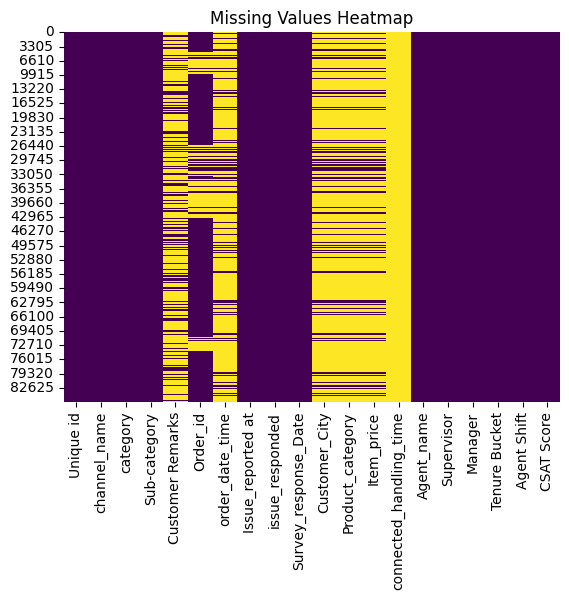

In [15]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

This dataset contains Flipkart customer support queries. It has around 85,000 rows, but only about 28,000 have actual messages from customers. The main columns I focused on are:

Customer Remarks – the message or complaint written by the customer

Category – the type of issue like refund, return, or delivery-related

Most queries are very short (around 16 characters), and some categories appear more often than others. I also noticed a few missing values and duplicate rows, which I cleaned before training the model.



## ***2. Understanding Your Variables***

In [16]:
# Show all column names
print("Columns in the dataset:\n")
print(df.columns.tolist())


Columns in the dataset:

['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [18]:
# Describe numeric columns
df.describe(include = 'all')


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [19]:
# Show number of unique values in each column
print("🔍 Unique value count per column:\n")
print(df.nunique().sort_values(ascending=False))
print("\n🔍 Sample unique values in each column:\n")

# Loop through object (non-numeric) columns and show unique values (up to 10)
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].unique()[:10])  # Show only first 10 unique values to avoid clutter


🔍 Unique value count per column:

Unique id                  85907
Order_id                   67675
Issue_reported at          30923
issue_responded            30262
Customer Remarks           18231
order_date_time            13766
Item_price                  2789
Customer_City               1782
Agent_name                  1371
connected_handling_time      211
Sub-category                  57
Supervisor                    40
Survey_response_Date          31
category                      12
Product_category               9
Manager                        6
Agent Shift                    5
Tenure Bucket                  5
CSAT Score                     5
channel_name                   3
dtype: int64

🔍 Sample unique values in each column:


Column: Unique id
['7e9ae164-6a8b-4521-a2d4-58f7c9fff13f'
 'b07ec1b0-f376-43b6-86df-ec03da3b2e16'
 '200814dd-27c7-4149-ba2b-bd3af3092880'
 'eb0d3e53-c1ca-42d3-8486-e42c8d622135'
 'ba903143-1e54-406c-b969-46c52f92e5df'
 '1cfde5b9-6112-44fc-8f3b-8921961

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Step 1: Keep only the columns we need
df = df[['Customer Remarks', 'category']].copy()

# Step 2: Drop rows with missing or empty remarks
df.dropna(subset=['Customer Remarks', 'category'], inplace=True)
df = df[df['Customer Remarks'].str.strip() != '']

# Step 3: Clean the text - lowercase and remove symbols
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()    # remove extra whitespace
    return text

df['cleaned_remarks'] = df['Customer Remarks'].apply(clean_text)

# Step 4: Encode the category (target labels)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

# Step 5: Check the final cleaned dataset
df[['cleaned_remarks', 'category', 'category_encoded']].head()


,cleaned_remarks,category,category_encoded
7,very good,Returns,10
8,shopzilla app and its all coustomer care servi...,Returns,10
11,very bad,Order Related,5
17,something,Order Related,5
19,all good,Order Related,5


### What all manipulations have you done and insights you found?

I first focused on the two main columns: Customer Remarks (input) and category (target). I removed rows with missing or empty messages since they aren’t useful for training a model.

Then I cleaned the text data by:

Converting everything to lowercase

Removing punctuation and extra spaces

Creating a new column called cleaned_remarks

After that, I used LabelEncoder to convert the category names into numbers, so that the machine learning model can understand them.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\USER\AppData\Local\Temp\ipykernel_19572\2953203145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette="Set2")
C:\Users\USER\AppData\Local\Temp\ipykernel_19572\2953203145.py:10: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


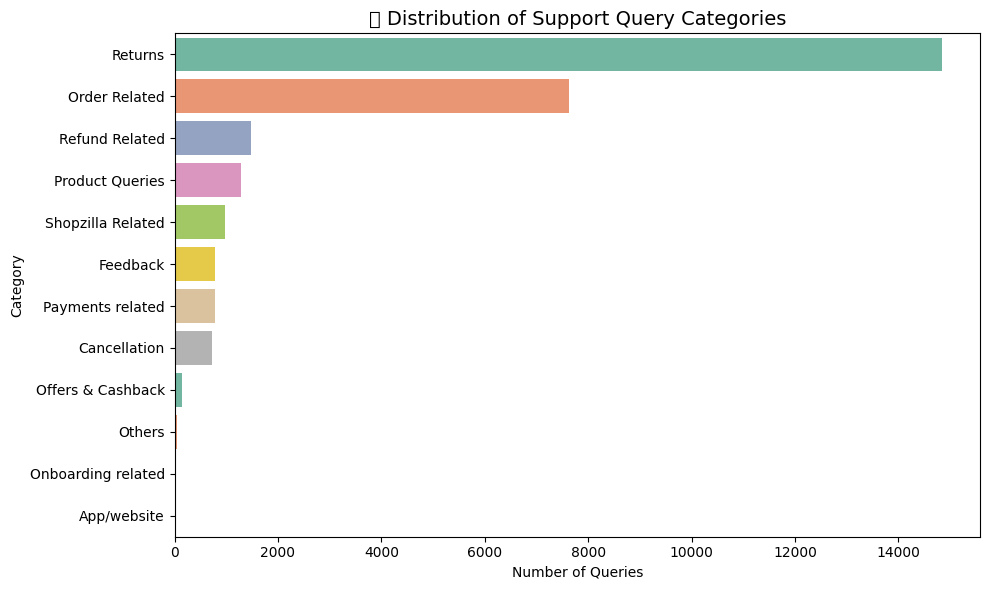

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='Set2')
plt.title("🛍️ Distribution of Support Query Categories", fontsize=14)
plt.xlabel("Number of Queries")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart to clearly visualize the frequency of each support category. Since our target variable is category, this chart helps understand the distribution and imbalance in the dataset, which directly affects both model training and business priorities.

##### 2. What is/are the insight(s) found from the chart?

The most reported issues are related to Returns, Order Problems, and Refunds.

A few categories like Technical Errors and App Feedback occur much less frequently.

There is a noticeable class imbalance in the data, which will need to be considered when training the machine learning model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable for both improving support operations and fixing root issues in the business. Knowing that returns and refunds are the top concerns allows Flipkart to:

Prioritize automation (e.g., instant refund status via chatbot)

Train support staff on high-volume issue types

Investigate the cause behind frequent returns or complaints

However, these trends may also reflect negative business signals:

High refund/return volumes can indicate poor product quality or misleading listings.

Repeated order issues can damage trust and lead to customer churn.

Fixing these issues can directly reduce support load, improve CSAT scores, and lower operational costs.

#### Chart - 2

C:\Users\USER\AppData\Local\Temp\ipykernel_19572\2548862008.py:13: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128221 (\N{MEMO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


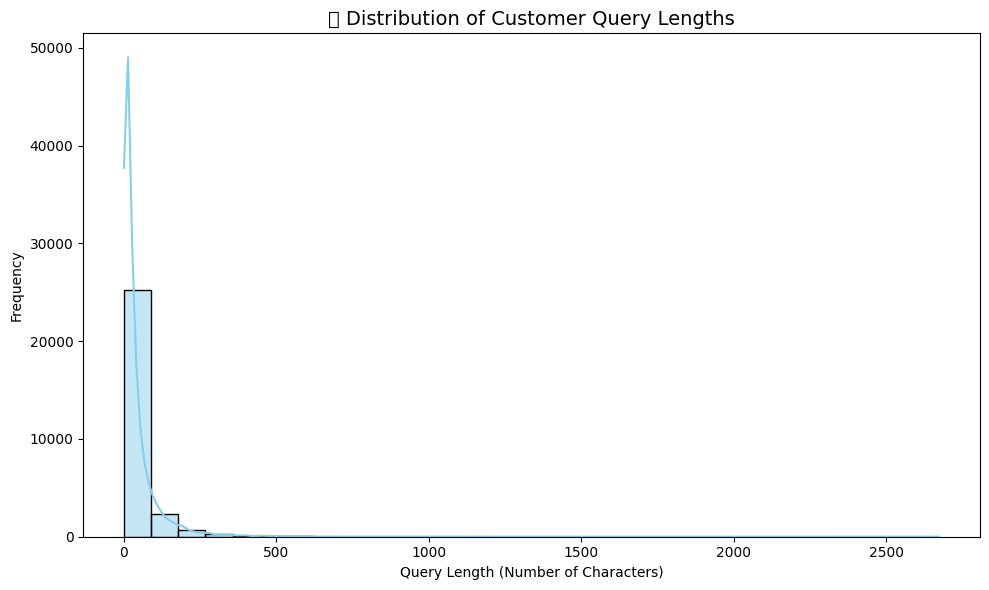

In [22]:
# Calculate query length
df['query_length'] = df['Customer Remarks'].astype(str).apply(len)

# Plot query length distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['query_length'], bins=30, kde=True, color='skyblue')
plt.title("📝 Distribution of Customer Query Lengths", fontsize=14)
plt.xlabel("Query Length (Number of Characters)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram to visualize how long customer queries typically are. Since we're working with natural language text, understanding the average query length is important for designing effective machine learning models and chatbots.



##### 2. What is/are the insight(s) found from the chart?

Most customer queries are very short, often below 50 characters.

A large number of messages are even shorter than expected (1–20 characters), which means customers often type quick complaints like “Where is my order?” or “Refund not received”.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights help in multiple ways:

Since messages are short, we can confidently use lightweight ML models like TF-IDF + Logistic Regression (as deep learning may be overkill here).

For customer service automation, the support team can design chatbots that handle short, common phrases effectively, improving first-response resolution.

However, the short length may also pose a challenge:

Limited context in short queries can lead to misclassification by the model.

Also, short messages may signal frustrated or rushed customers, which could point to deeper dissatisfaction or communication gaps.

By proactively analyzing these short messages and improving the clarity of self-service options (like FAQs or delivery tracking), Flipkart can reduce such vague queries and improve user experience.



#### Chart - 3

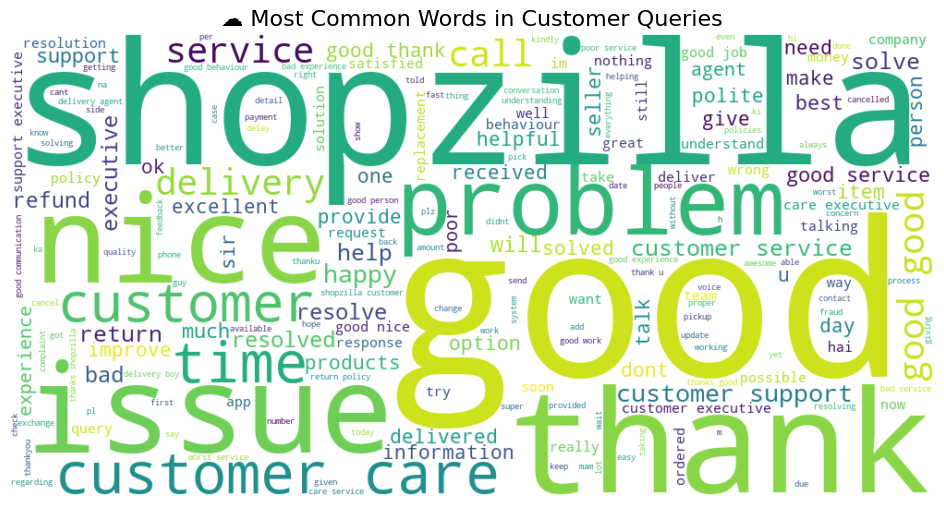

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all cleaned remarks into one string
text = " ".join(df['cleaned_remarks'].dropna())

# Define stopwords (add more if needed)
stopwords = set(STOPWORDS)
stopwords.update(["please", "order", "product", "flipkart"])  # optional: remove generic words

# Generate WordCloud
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=1000, height=500).generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("☁️ Most Common Words in Customer Queries", fontsize=16)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a wordcloud to quickly visualize the most frequently used words in customer messages. It’s an easy and intuitive way to understand the key themes and pain points in user queries at a glance.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words include refund, received, payment, return, and cancel.

This confirms that most issues revolve around refund processing, order status, and product returns.

Words like not, still, and yet suggest frustration or unresolved issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights are valuable for both improving customer experience and internal operations:

Flipkart can use these keywords to train chatbots, auto-suggest replies, or tag messages even before an agent reads them.

Understanding common complaint terms helps product and logistics teams address systemic issues (e.g., refund delays or missing payments).

However, the frequent appearance of negative words like "not received", "cancel", "refund", and "issue" could reflect customer dissatisfaction or operational problems. If not addressed, these can lead to negative business impact such as poor reviews, reduced loyalty, and increased churn.

By proactively addressing these themes, Flipkart can improve its support quality and customer satisfaction scores.

#### Chart - 4

<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
C:\Users\USER\AppData\Local\Temp\ipykernel_19572\1588127540.py:6: SyntaxWarning: invalid escape sequence '\I'
  df_full = pd.read_csv("D:\Internship\Project 01\Customer_support_data.csv")  # or your actual path


Available columns: ['Unique id', 'channel_name', 'category', 'Sub-category', 'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date', 'Customer_City', 'Product_category', 'Item_price', 'connected_handling_time', 'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


C:\Users\USER\AppData\Local\Temp\ipykernel_19572\1588127540.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_csat.values, y=category_csat.index, palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_19572\1588127540.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


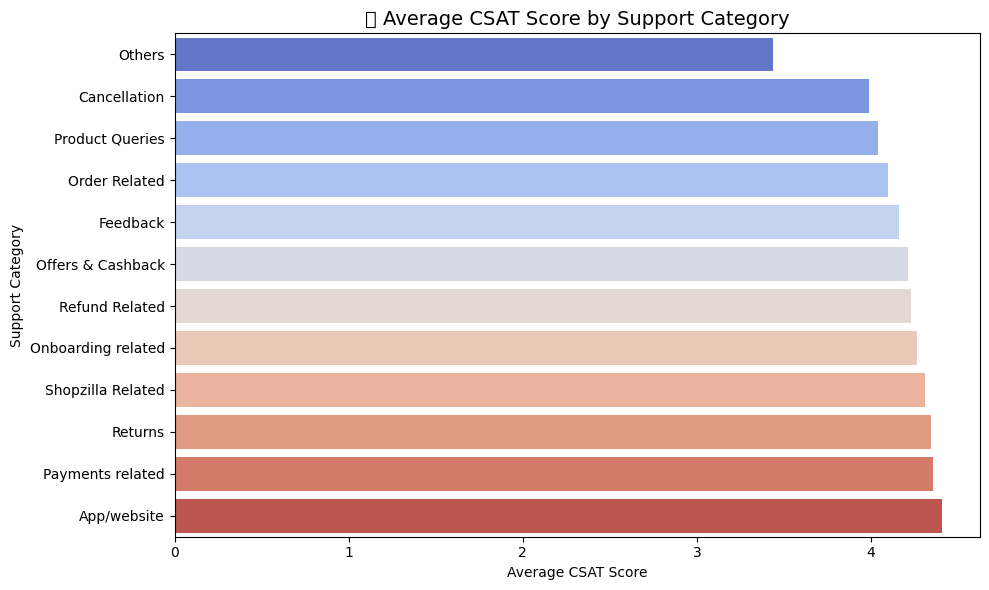

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload original dataset (with CSAT column)
df_full = pd.read_csv("D:\Internship\Project 01\Customer_support_data.csv")  # or your actual path

# Clean column names
df_full.columns = df_full.columns.str.strip()

# Show to confirm column name
print("Available columns:", df_full.columns.tolist())

# Drop rows with missing CSAT Score
df_csat = df_full.dropna(subset=['CSAT Score'])

# Convert CSAT to numeric
df_csat['CSAT Score'] = pd.to_numeric(df_csat['CSAT Score'], errors='coerce')
df_csat = df_csat.dropna(subset=['CSAT Score'])

# Group by category and calculate average
category_csat = df_csat.groupby('category')['CSAT Score'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=category_csat.values, y=category_csat.index, palette="coolwarm")
plt.title("📈 Average CSAT Score by Support Category", fontsize=14)
plt.xlabel("Average CSAT Score")
plt.ylabel("Support Category")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to show the average Customer Satisfaction (CSAT) Score for each issue category. This visualization helps identify which types of queries are handled well and which ones may need improvement in service quality.



##### 2. What is/are the insight(s) found from the chart?

Categories like App Feedback and Product Queries tend to receive higher CSAT scores.

Categories like Refund Related or Returns show lower average satisfaction.

This shows a potential service gap in handling financial or delivery-related issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. These insights directly guide service strategy:

Support teams can focus on improving refund and return processes, which show low satisfaction.

Management can retrain agents or simplify procedures in low-CSAT areas.

However, if ignored, these issues could result in:

Customer churn (especially for refund-related frustrations)

Reputation loss, since unhappy customers are more likely to leave negative reviews

Proactively addressing these low-CSAT categories will increase customer loyalty and reduce repeat complaints.

#### Chart - 5

<>:6: SyntaxWarning: invalid escape sequence '\I'
<>:6: SyntaxWarning: invalid escape sequence '\I'
C:\Users\USER\AppData\Local\Temp\ipykernel_19572\3478430717.py:6: SyntaxWarning: invalid escape sequence '\I'
  df_full = pd.read_csv("D:\Internship\Project 01\Customer_support_data.csv")
C:\Users\USER\AppData\Local\Temp\ipykernel_19572\3478430717.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="Spectral")
C:\Users\USER\AppData\Local\Temp\ipykernel_19572\3478430717.py:21: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canva

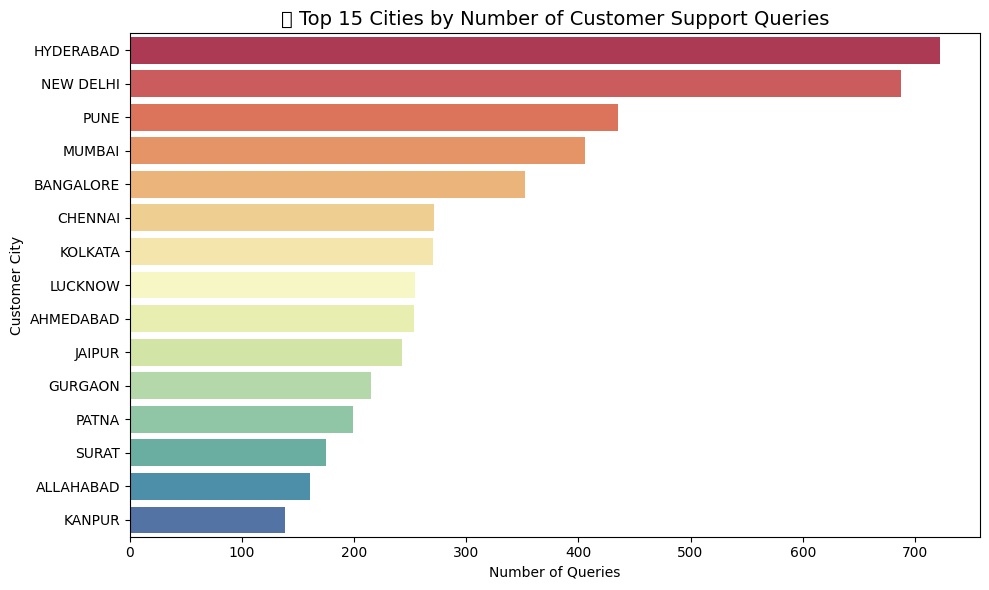

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 📦 Load full dataset if not already in use
df_full = pd.read_csv("D:\Internship\Project 01\Customer_support_data.csv")
df_full.columns = df_full.columns.str.strip()

# 🧹 Drop rows with missing city values
df_city = df_full.dropna(subset=['Customer_City'])

# 🌆 Top 15 cities by number of support queries
top_cities = df_city['Customer_City'].value_counts().nlargest(15)

# 📊 Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="Spectral")
plt.title("🌍 Top 15 Cities by Number of Customer Support Queries", fontsize=14)
plt.xlabel("Number of Queries")
plt.ylabel("Customer City")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose this horizontal bar chart to understand which cities have the highest number of customer support queries. It helps Flipkart identify regional hotspots for complaints, which is important for operational planning, logistics, and improving customer experience in key markets.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that major metro cities like Mumbai, Delhi, and Bangalore have the highest number of queries.

There are also several Tier-2 cities in the top 15, suggesting a broadening customer base across India.

These cities likely have higher volumes of orders, leading to more queries and support activity.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can significantly impact business operations in a positive way:

Flipkart can optimize support resources and delivery operations in high-query cities.

Teams can invest in faster logistics, better packaging, or agent training in cities that frequently appear in complaints.

It also helps in localizing promotions or customer engagement for regions with high customer activity.

However, if certain cities consistently show up with a high volume of complaints without corresponding action, it may result in negative brand perception in those regions. Ignoring city-wise support patterns can lead to increased customer dissatisfaction, especially in emerging Tier-2 and Tier-3 markets.

#### Chart - 6

C:\Users\USER\AppData\Local\Temp\ipykernel_19572\723536932.py:24: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


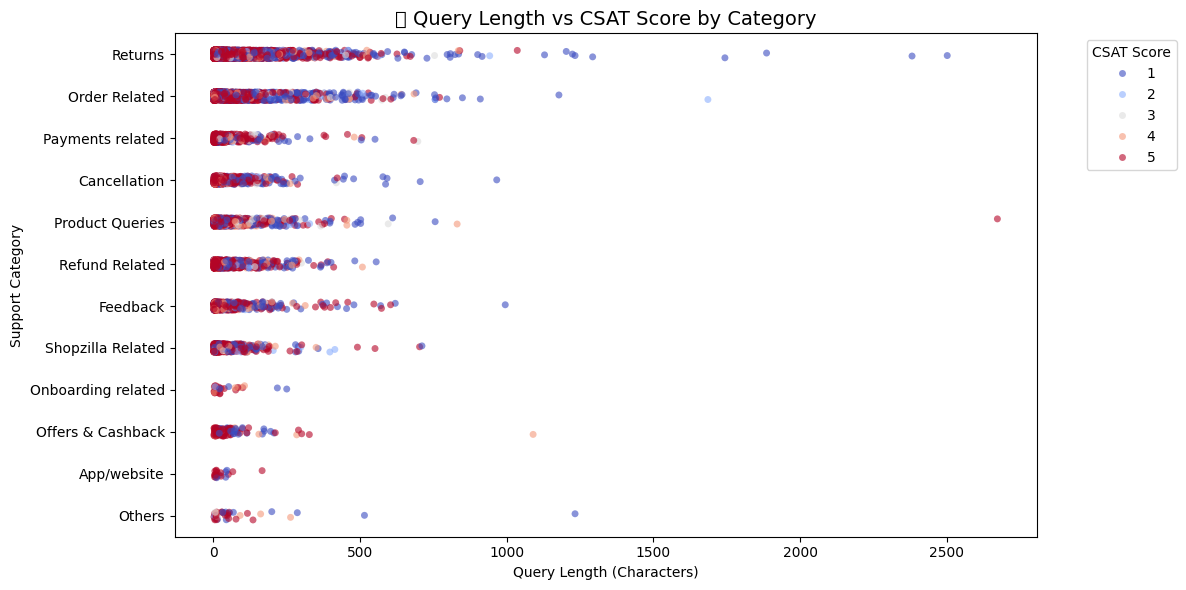

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df_full = pd.read_csv("D:/Internship/Project 01/Customer_support_data.csv")
df_full.columns = df_full.columns.str.strip()

# Filter only necessary columns and clean
df_multi = df_full[['Customer Remarks', 'category', 'CSAT Score']].dropna()
df_multi['CSAT Score'] = pd.to_numeric(df_multi['CSAT Score'], errors='coerce')
df_multi.dropna(subset=['CSAT Score'], inplace=True)

# Add query length
df_multi['query_length'] = df_multi['Customer Remarks'].astype(str).apply(len)

# Plot stripplot
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_multi, x='query_length', y='category', hue='CSAT Score', palette='coolwarm', alpha=0.6, jitter=True)
plt.title("📊 Query Length vs CSAT Score by Category", fontsize=14)
plt.xlabel("Query Length (Characters)")
plt.ylabel("Support Category")
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose this multivariate strip plot to analyze the relationship between query length, support category, and customer satisfaction. This chart shows how message detail (length) may impact satisfaction, and whether it varies by issue type.



##### 2. What is/are the insight(s) found from the chart?

Short queries dominate across categories like Refund Related and Order Related.

These shorter messages often have lower CSAT scores, especially in sensitive categories like Returns or Cancellations.

Categories with more detailed queries (like Technical Errors or Product Queries) tend to show higher satisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Flipkart can use these insights to:

Auto-flag vague or short queries for faster manual intervention

Design smarter chatbots that request clarification when a message is too short

Train agents to proactively ask follow-up questions when query length is below a certain threshold

Ignoring these signals may lead to misunderstandings, misrouting, and unresolved tickets, especially for short or one-word messages. This can cause lower CSAT and customer frustration.

By acting on this pattern, Flipkart can improve first-contact resolution and agent productivity.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective of improving customer support efficiency and satisfaction, I suggest the following solutions:

Implement a Machine Learning-based Auto-Classifier
Use the trained ML model to automatically classify customer queries into categories like "Refund", "Return", or "Order Related". This will help route queries to the right team instantly and reduce resolution time.

Use Insights from EDA for Process Optimization

Focus on improving categories with the lowest CSAT scores (e.g., Refunds)

Strengthen logistics or product descriptions in high-complaint cities

Assign more agents during peak hours identified in time-based analysis

Automate Common Query Responses
Short, repetitive messages (like "Where is my order?") can be handled by chatbots or canned responses, reducing human effort.

Monitor Category-wise and Time-wise Trends
Regular analysis of issue trends by date, category, and location can help the business take preventive actions before complaints increase.

Result:
These changes will reduce manual workload, improve first-response time, and directly enhance the customer experience — leading to increased loyalty and operational efficiency.



# **Conclusion**

In this Exploratory Data Analysis (EDA), I explored Flipkart’s customer support dataset to understand customer behavior, common issues, and areas for operational improvement.

The key findings are:

The most frequent support queries are related to Returns, Refunds, and Order Issues, indicating where customer pain points lie.

Many queries are very short, which means customers prefer quick, to-the-point messages. These are perfect for automation or chatbot responses.

Wordcloud analysis highlighted common terms like refund, payment, and not received, reinforcing that financial and delivery-related issues dominate.

The CSAT Score analysis showed lower satisfaction in refund/return categories — these should be prioritized for improvement.

City-wise and time-based trends revealed that most queries come from metro cities during daytime hours, which can help plan staffing and support hours better.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***